In [13]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import loggamma as lng
from scipy.optimize import minimize

ML estimate for: 
S=  17.01101525401727 +-  3.1429248946318955  counts
B=  20.09439131937403 +-  0.6910460794378793  counts


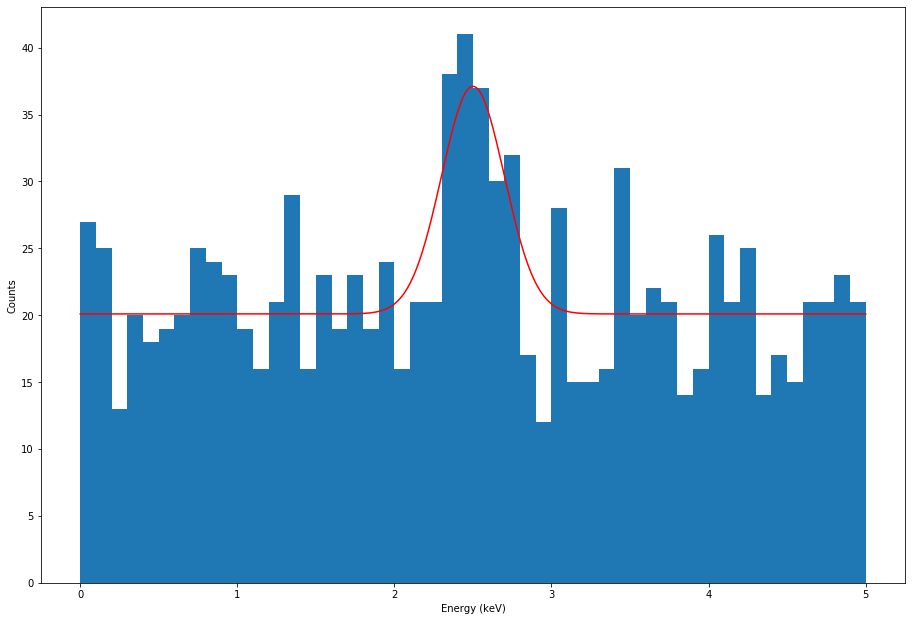

In [14]:
#Creating list of data
data= open("xray_data.txt", "r")
f = data.readlines()

#Indexing to get Energies and Counts as their own lists
Es = [float(f[i][:10]) for i in range(1,51)]
n = [float(f[i][10:]) for i in range(1,51)]

#Given params
sig= .2
E0= 2.5

#Initial guesses
S = 10
B = 10
p0 = [S,B]

#Negative sum of lnL
def sumlnL(params):
    S,B = params
    totallnL = []
    for i in range(len(n)):
        factor = B + S*np.exp(-(.5)*((Es[i]-E0)/sig)**2)
        loglike= -factor +n[i]*np.log(factor) - lng(n[i]+1)
        totallnL.append(-loglike)
    total = np.sum(totallnL)
    return total

#Minimizing
res = minimize(sumlnL,p0,method = "BFGS")
Sbest, Bbest = res.x

#Using Hessian inverse to get uncertainties
sigS = np.sqrt(res.hess_inv[0][0])
sigB = np.sqrt(res.hess_inv[1][1])

#Display output (I really should learn LaTex so this is prettier)
print('ML estimate for: \nS= ',Sbest,'+- ',sigS,' counts\nB= ',Bbest,'+- ',sigB,' counts')

#Making points for fit line
fit = lambda E: Bbest + Sbest*np.exp(-(.5)*((E-E0)/sig)**2)
ys = [fit(E) for E in np.linspace(0,5,1e3)]
xs= np.linspace(0,5,1e3)

#Plotting
plt.axes([0,0,2,2])
plt.plot(xs,ys, 'r')
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.bar(Es,n,width = Es[1]-Es[0])
plt.show()

ML estimate for: 
S=  17.011767210752897 +-  0.9851614647149205  counts
B=  20.094312724793415 +-  1.0201620719604954  counts
E0=  2.496285671228901 +-  0.040589334097353554  keV


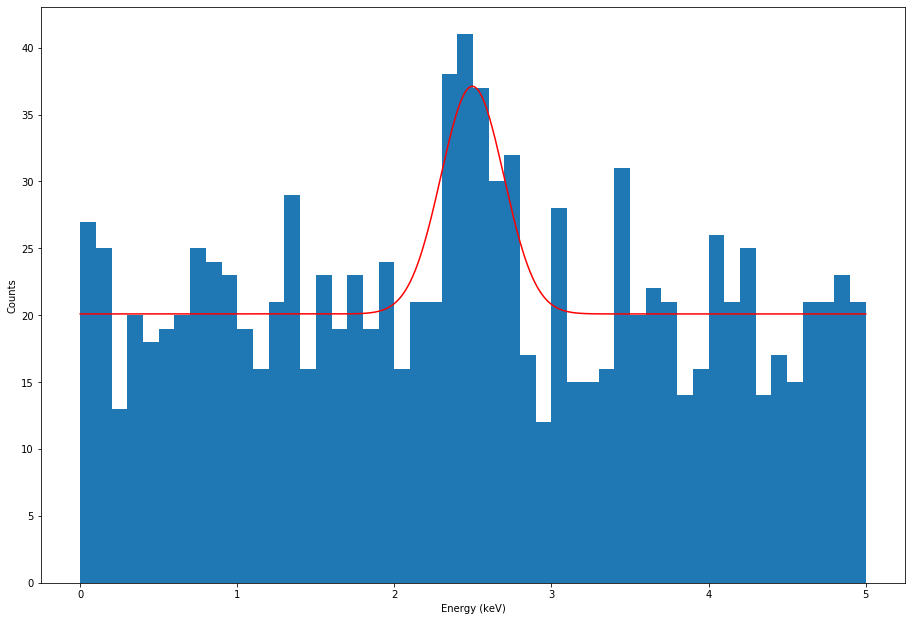

In [15]:
#Now sigma is only given
sig= .2

#Initial guesses
S = 10
B = 10
E0 = 5
p0 = [S,B,E0]

#Negative sum of lnL
def sumlnL(params):
    S,B,E0 = params
    totallnL = []
    for i in range(len(n)):
        factor = B + S*np.exp(-(.5)*((Es[i]-E0)/sig)**2)
        loglike= -factor +n[i]*np.log(factor) - lng(n[i]+1)
        totallnL.append(-loglike)
    total = np.sum(totallnL)
    return total

#Minimizing with Nelder-Mead first
res = minimize(sumlnL,p0,method = "Nelder-Mead")

#Output to seed to BFGS
p1 = res.x

#Minimizing again with BFGS
newres = minimize(sumlnL,p1,method = "BFGS")
Sbest,Bbest,E0best = newres.x

#Using Hessian inverse to get uncertainties
sigS = np.sqrt(newres.hess_inv[0][0])
sigB = np.sqrt(newres.hess_inv[1][1])
sigE0 = np.sqrt(newres.hess_inv[2][2])

#Display output
print('ML estimate for: \nS= ',Sbest,'+- ',sigS,' counts\nB= ',Bbest,'+- ',sigB,' counts\nE0= ',E0best,'+- ',sigE0,' keV')

#Making points for fit line
fit = lambda E: Bbest + Sbest*np.exp(-(.5)*((E-E0best)/sig)**2)
ys = [fit(E) for E in np.linspace(0,5,1e3)]
xs= np.linspace(0,5,1e3)

#Plotting
plt.axes([0,0,2,2])
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.plot(xs,ys, 'r')
plt.bar(Es,n,width = Es[1]-Es[0])
plt.show()